In [138]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/sa22/Documents/code/ML_financial_fraud/data/raw/dataset.csv")

In [139]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [140]:
df.shape

(6362620, 11)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [142]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [143]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [144]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Univariate

In [145]:
counts_per_type = df['type'].value_counts()
counts_per_type

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

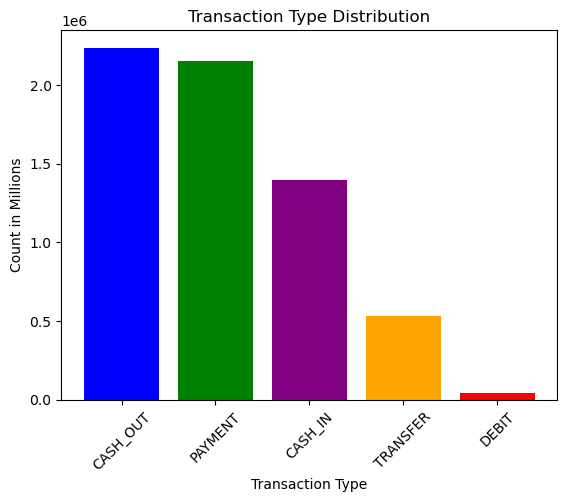

In [146]:
plt.bar(counts_per_type.index, counts_per_type.values, color=['blue', 'green', 'purple', 'orange', 'red'])
plt.xlabel("Transaction Type")
plt.ylabel("Count in Millions")
plt.title("Transaction Type Distribution")
plt.xticks(rotation=45)
plt.show()

Cash outs and payments are the 2 most common transaction types. Debit being the least common by far.

/var/folders/d3/gvkrf42n6cs_vbsl97177w3m0000gn/T/ipykernel_42127/3850437570.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='isFraud', palette=['blue', 'red'])


<function matplotlib.pyplot.show(close=None, block=None)>

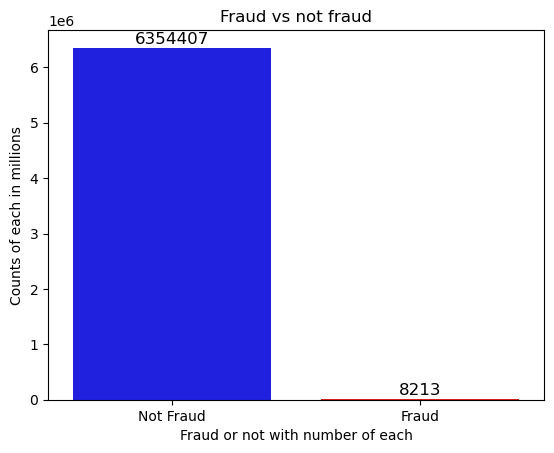

In [147]:
ax = sns.countplot(data=df, x='isFraud', palette=['blue', 'red'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=1)

plt.title('Fraud vs not fraud')
plt.xlabel('Fraud or not with number of each')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.ylabel('Counts of each in millions')
plt.show

The amount of transactions labeled fraud are extremely tiny compared to the amount labeled as legitimate. In this dataset of over six million transactions, only 8213 are considered fraud. The red colored bar is hardly even visible.

# Bivariate

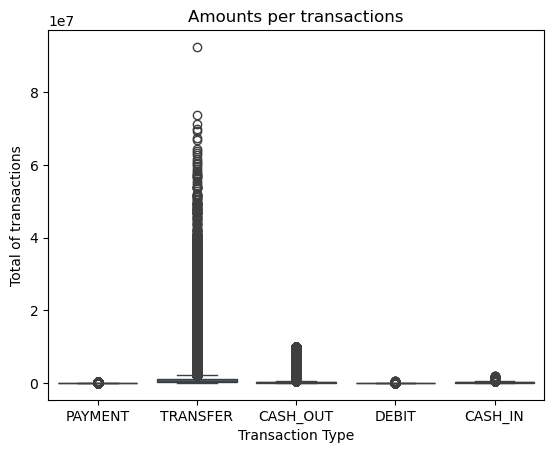

In [148]:
sns.boxplot(data=df, x='type', y='amount')
plt.title('Amounts per transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Total of transactions')
plt.show()

Transfers have by far the highest number of outliers. The second highest is cash outs which is far ahead of the rest, but transfer still dominates. Interesting to note that the earlier bar chart showed transfers as the second least common transaction type, being about three times less common than the next more common transaction type, and yet the amounts themselves being exchanged in transfer are still far greater than everything else put together.

<Axes: >

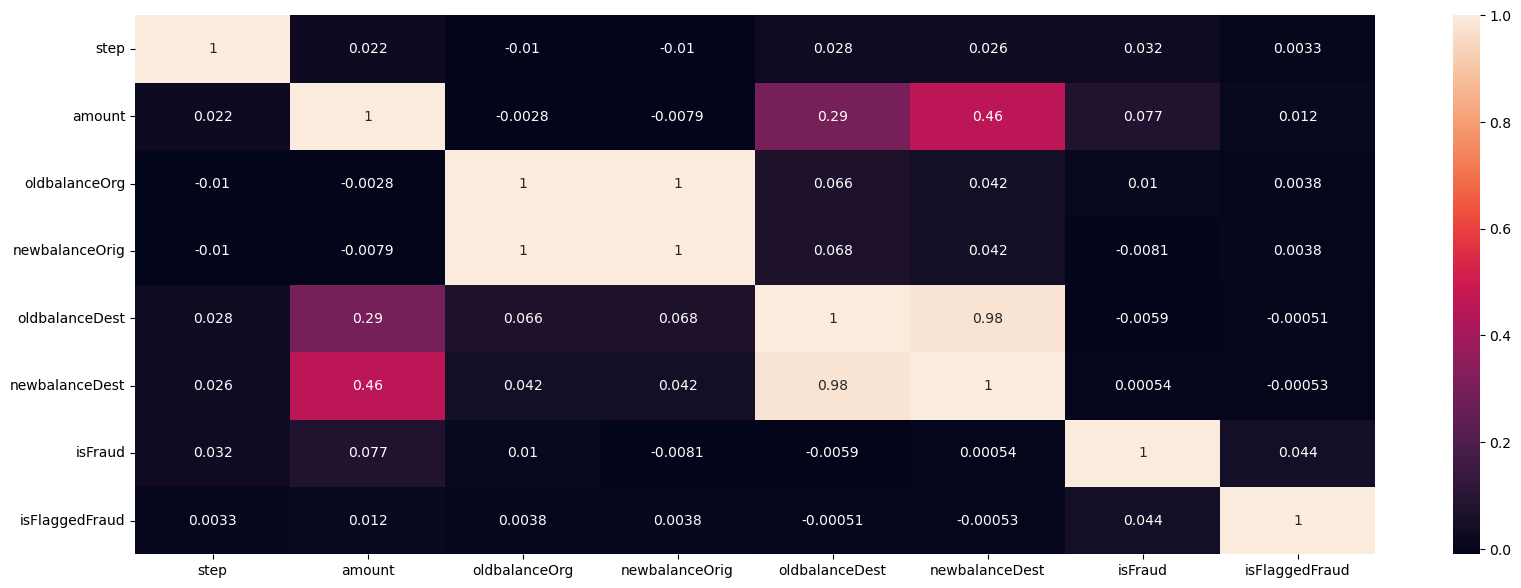

In [95]:
# droppping non-numerical columns
correlation_df = df.drop(columns=['type','nameOrig','nameDest'])

plt.figure(figsize=(20,7))
sns.heatmap(correlation_df.corr(), annot=True)

The highest correlations are between oldbalanceDest with newbalanceDest and oldbalanceOrg with newbalanceOrig. That seems to make logical sense as oldbalanceOrg and newbalanceOrig have a perfect 1 to 1 correlation since they are the same accounts with the balance transferred, before and after. I find it a bit odd that oldbalanceDest and newbalanceDest have .98 correlation instead of 1, like the origin accounts do. After those, the next highest correlation is amount and newbalanceDest, however it is only at .46. The variable isFraud doesn't seem to have meaningful correlation with anything.

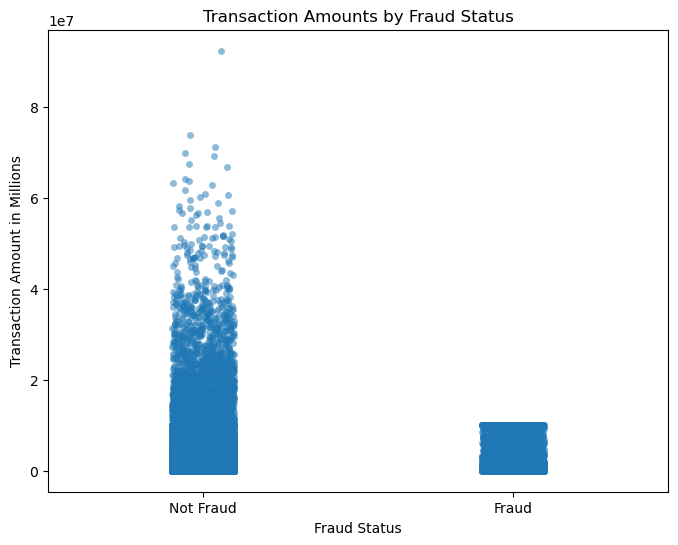

In [106]:
plt.figure(figsize=(8,6))
sns.stripplot(x='isFraud', y='amount', data=df, jitter=True, alpha=0.5)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'])
plt.ylabel('Transaction Amount in Millions')
plt.show()


All the amounts labeled as fraud max out around the one million dollar mark. We can also see the huge outlier in not fraud of over nine million dollars.

# Multivariate

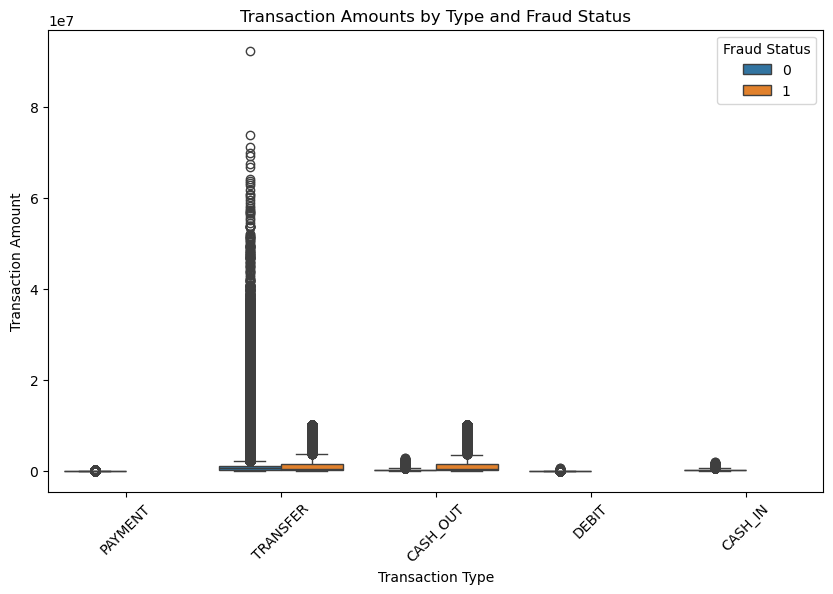

In [137]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='type', y='amount', hue='isFraud')

plt.title('Transaction Amounts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.legend(title='Fraud Status')
plt.xticks(rotation=45)
plt.show()

Fraud is only seen here in transfers and cash outs.